In [1]:
import numpy as np
import pickle
from joblib import Parallel, delayed
from pybads import BADS
from ddm_ex22_utils import *
from ddm_utils import simulate_ddm

In [62]:
N_sim = 2500; v = 0.2; a = 2
sim_results = Parallel(n_jobs=-1)(delayed(simulate_ddm)(v, a) for _ in range(N_sim))


choices, RTs = parse_sim_results(sim_results)
    
with open('sample_rt.pkl', 'wb') as f:
    pickle.dump(RTs, f)
with open('sample_choice.pkl', 'wb') as f:
    pickle.dump(choices, f)


likelihood in the bounds

In [63]:
lb = np.array([-10,0.01, 0.1]); ub = np.array([10, 5, 0.9])
n_points = 10

# Generate the grid for each parameter
v = np.linspace(lb[0], ub[0], n_points)
a = np.linspace(lb[1], ub[1], n_points)
w = np.linspace(lb[2], ub[2], n_points)

# Create a meshgrid for pairs of parameters
V, W = np.meshgrid(v, w)
W, A = np.meshgrid(w, a)
V, A = np.meshgrid(v, a)

likelihood_vw = np.zeros((n_points, n_points))
likelihood_wa = np.zeros((n_points, n_points))
likelihood_va = np.zeros((n_points, n_points))

for i in range(n_points):
    for j in range(n_points):
        likelihood_vw[i, j] = -1*bads_target_neg_loglike([V[i, j], A[i, j], W[i, j]])
        likelihood_wa[i, j] = -1*bads_target_neg_loglike([V[i, j], A[i, j], W[i, j]])
        likelihood_va[i, j] = -1*bads_target_neg_loglike([V[i, j], A[i, j], W[i, j]])



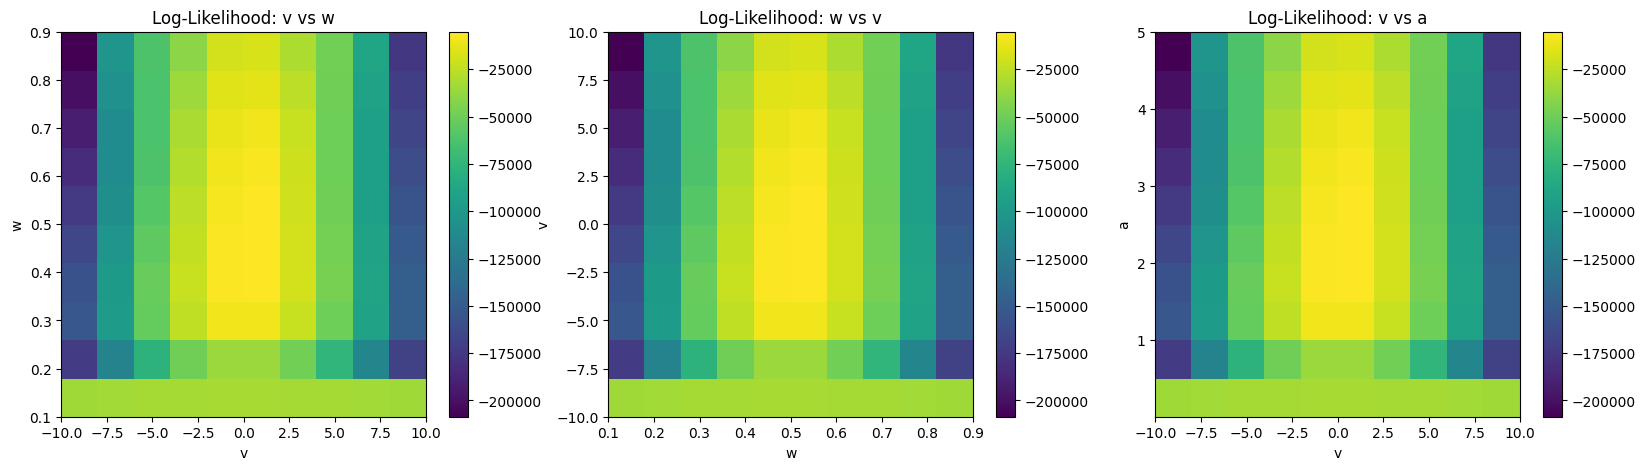

In [64]:
# Plot v vs w likelihood matrix
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.imshow(likelihood_vw, extent=[lb[0], ub[0], lb[2], ub[2]], origin='lower', aspect='auto', cmap='viridis'); plt.colorbar();
plt.xlabel('v')
plt.ylabel('w')
plt.title('Log-Likelihood: v vs w')

# Plot w vs a likelihood matrix
plt.subplot(1,3,2)
plt.imshow(likelihood_wa, extent=[lb[2], ub[2], lb[0], ub[0]], origin='lower', aspect='auto', cmap='viridis'); plt.colorbar();
plt.xlabel('w')
plt.ylabel('v')
plt.title('Log-Likelihood: w vs v')

# Plot v vs a likelihood matrix
plt.subplot(1,3,3)
plt.imshow(likelihood_va, extent=[lb[0], ub[0], lb[1], ub[1]], origin='lower', aspect='auto', cmap='viridis'); plt.colorbar();
plt.xlabel('v')
plt.ylabel('a')
plt.title('Log-Likelihood: v vs a')
plt.show()


In [3]:
lb = np.array([-10,0.01, 0.1]); ub = np.array([10, 5, 0.9])
plb = np.array([-5,1,0.3]); pub = np.array([5,3,0.7])
n = 2500
bads_500_result = bads_vs_N(lb,ub,plb,pub,n,v,a)

In [4]:
with open('bads_n2500_500_result.pkl', 'wb') as f:
    pickle.dump(bads_500_result, f)


In [7]:
bads_500_result_np = np.array(bads_500_result)

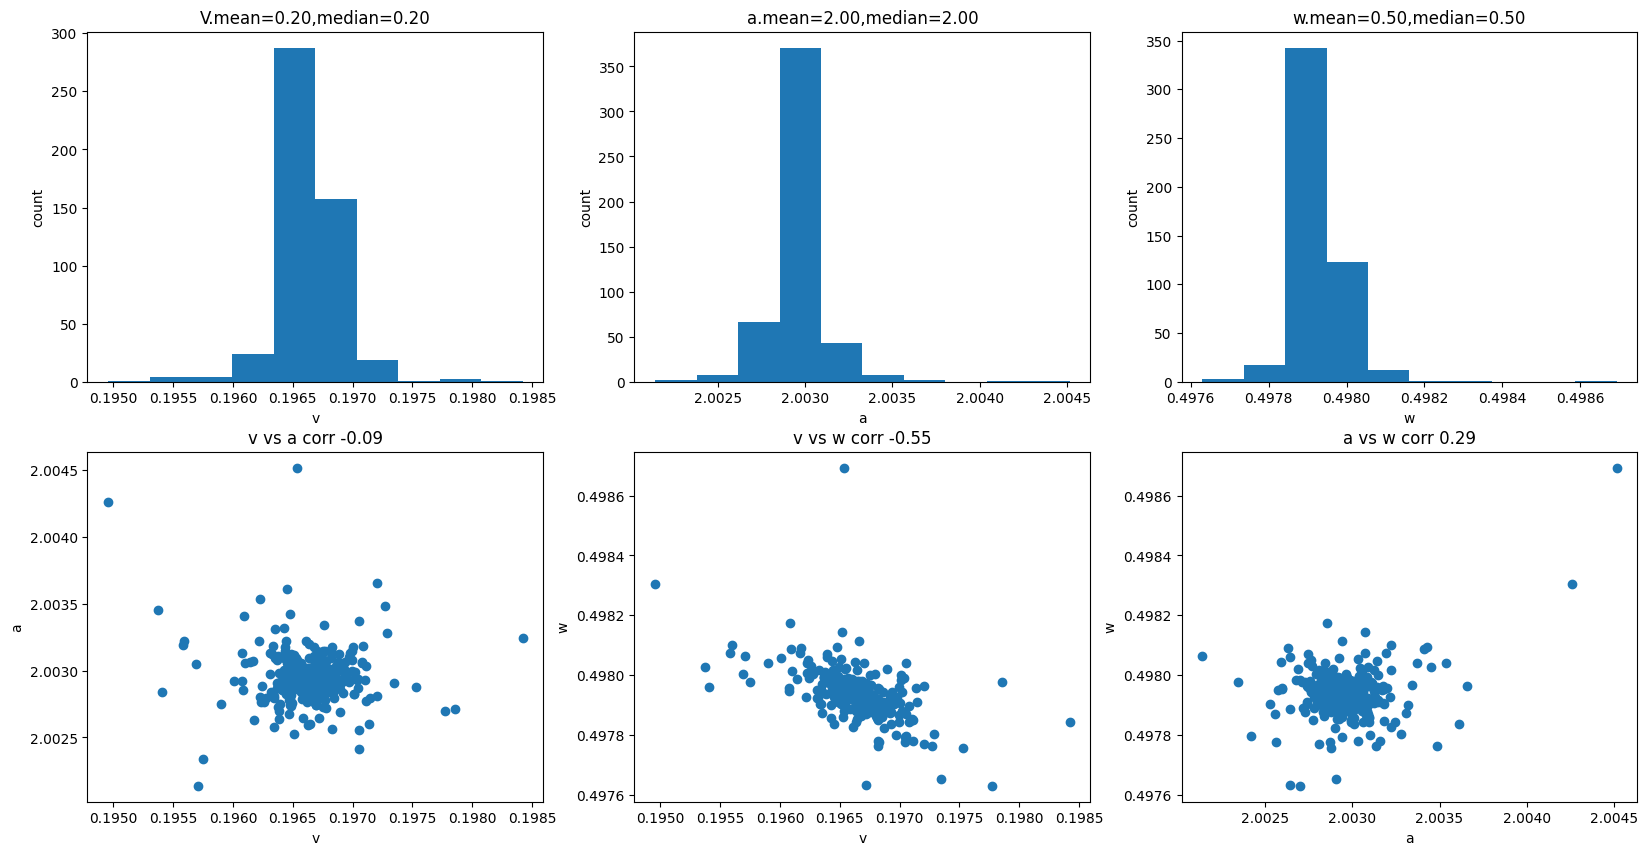

In [25]:
bads_v = bads_500_result_np[:,0]; bads_a = bads_500_result_np[:,1]; bads_w = bads_500_result_np[:,2];
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.hist(bads_v);plt.xlabel('v');plt.ylabel('count'); plt.title(f'V.mean={np.mean(bads_v):.2f},median={np.median(bads_v):.2f}');
plt.subplot(2,3,2)
plt.hist(bads_a);plt.xlabel('a');plt.ylabel('count'); plt.title(f'a.mean={np.mean(bads_a):.2f},median={np.median(bads_a):.2f}');
plt.subplot(2,3,3)
plt.hist(bads_w);plt.xlabel('w');plt.ylabel('count'); plt.title(f'w.mean={np.mean(bads_w):.2f},median={np.median(bads_w):.2f}');

plt.subplot(2,3,4)
plt.scatter(bads_v,bads_a);plt.xlabel('v');plt.ylabel('a'); plt.title(f'v vs a corr {np.corrcoef(bads_v,bads_a)[0,1]:.2f}');
plt.subplot(2,3,5)
plt.scatter(bads_v,bads_w);plt.xlabel('v');plt.ylabel('w'); plt.title(f'v vs w corr {np.corrcoef(bads_v,bads_w)[0,1]:.2f}');
plt.subplot(2,3,6)
plt.scatter(bads_a,bads_w);plt.xlabel('a');plt.ylabel('w'); plt.title(f'a vs w corr {np.corrcoef(bads_a,bads_w)[0,1]:.2f}');


With v = 1.1

In [58]:
N_sim = 2500; v = 1.1; a = 2
sim_results = Parallel(n_jobs=-1)(delayed(simulate_ddm)(v, a) for _ in range(N_sim))


choices, RTs = parse_sim_results(sim_results)
    
with open('sample_rt.pkl', 'wb') as f:
    pickle.dump(RTs, f)
with open('sample_choice.pkl', 'wb') as f:
    pickle.dump(choices, f)


In [59]:
lb = np.array([-10,0.01, 0.1]); ub = np.array([10, 5, 0.9])
n_points = 10

# Generate the grid for each parameter
v = np.linspace(lb[0], ub[0], n_points)
a = np.linspace(lb[1], ub[1], n_points)
w = np.linspace(lb[2], ub[2], n_points)

# Create a meshgrid for pairs of parameters
V, W = np.meshgrid(v, w)
W, A = np.meshgrid(w, a)
V, A = np.meshgrid(v, a)

likelihood_vw = np.zeros((n_points, n_points))
likelihood_wa = np.zeros((n_points, n_points))
likelihood_va = np.zeros((n_points, n_points))

for i in range(n_points):
    for j in range(n_points):
        likelihood_vw[i, j] = -1*bads_target_neg_loglike([V[i, j], A[i, j], W[i, j]])
        likelihood_wa[i, j] = -1*bads_target_neg_loglike([V[i, j], A[i, j], W[i, j]])
        likelihood_va[i, j] = -1*bads_target_neg_loglike([V[i, j], A[i, j], W[i, j]])



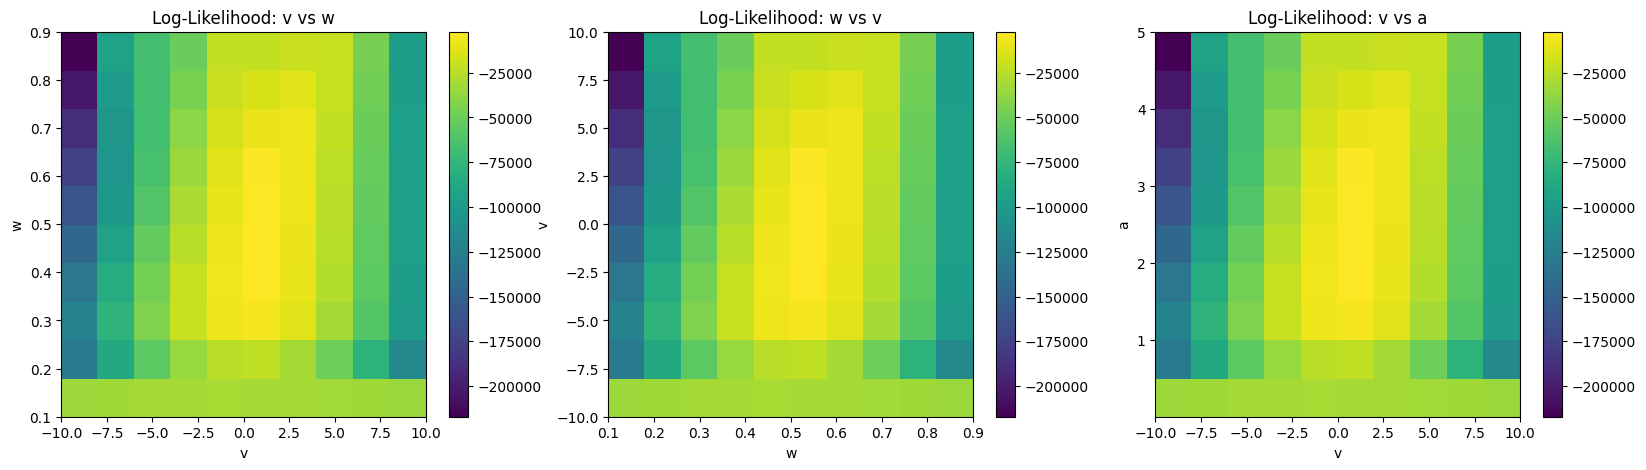

In [61]:
# Plot v vs w likelihood matrix
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.imshow(likelihood_vw, extent=[lb[0], ub[0], lb[2], ub[2]], origin='lower', aspect='auto', cmap='viridis'); plt.colorbar();
plt.xlabel('v')
plt.ylabel('w')
plt.title('Log-Likelihood: v vs w')

# Plot w vs a likelihood matrix
plt.subplot(1,3,2)
plt.imshow(likelihood_wa, extent=[lb[2], ub[2], lb[0], ub[0]], origin='lower', aspect='auto', cmap='viridis'); plt.colorbar();
plt.xlabel('w')
plt.ylabel('v')
plt.title('Log-Likelihood: w vs v')

# Plot v vs a likelihood matrix
plt.subplot(1,3,3)
plt.imshow(likelihood_va, extent=[lb[0], ub[0], lb[1], ub[1]], origin='lower', aspect='auto', cmap='viridis'); plt.colorbar();
plt.xlabel('v')
plt.ylabel('a')
plt.title('Log-Likelihood: v vs a')
plt.show()


In [18]:
lb = np.array([-10,0.01, 0.1]); ub = np.array([10, 5, 0.9])
plb = np.array([-5,1,0.3]); pub = np.array([5,3,0.7])
n = 2500
bads_500_result_2 = bads_vs_N(lb,ub,plb,pub,n,v,a)

In [19]:
with open('bads_n2500_500_result_2.pkl', 'wb') as f:
    pickle.dump(bads_500_result_2, f)

In [20]:
bads_500_result_np_2 = np.array(bads_500_result_2)

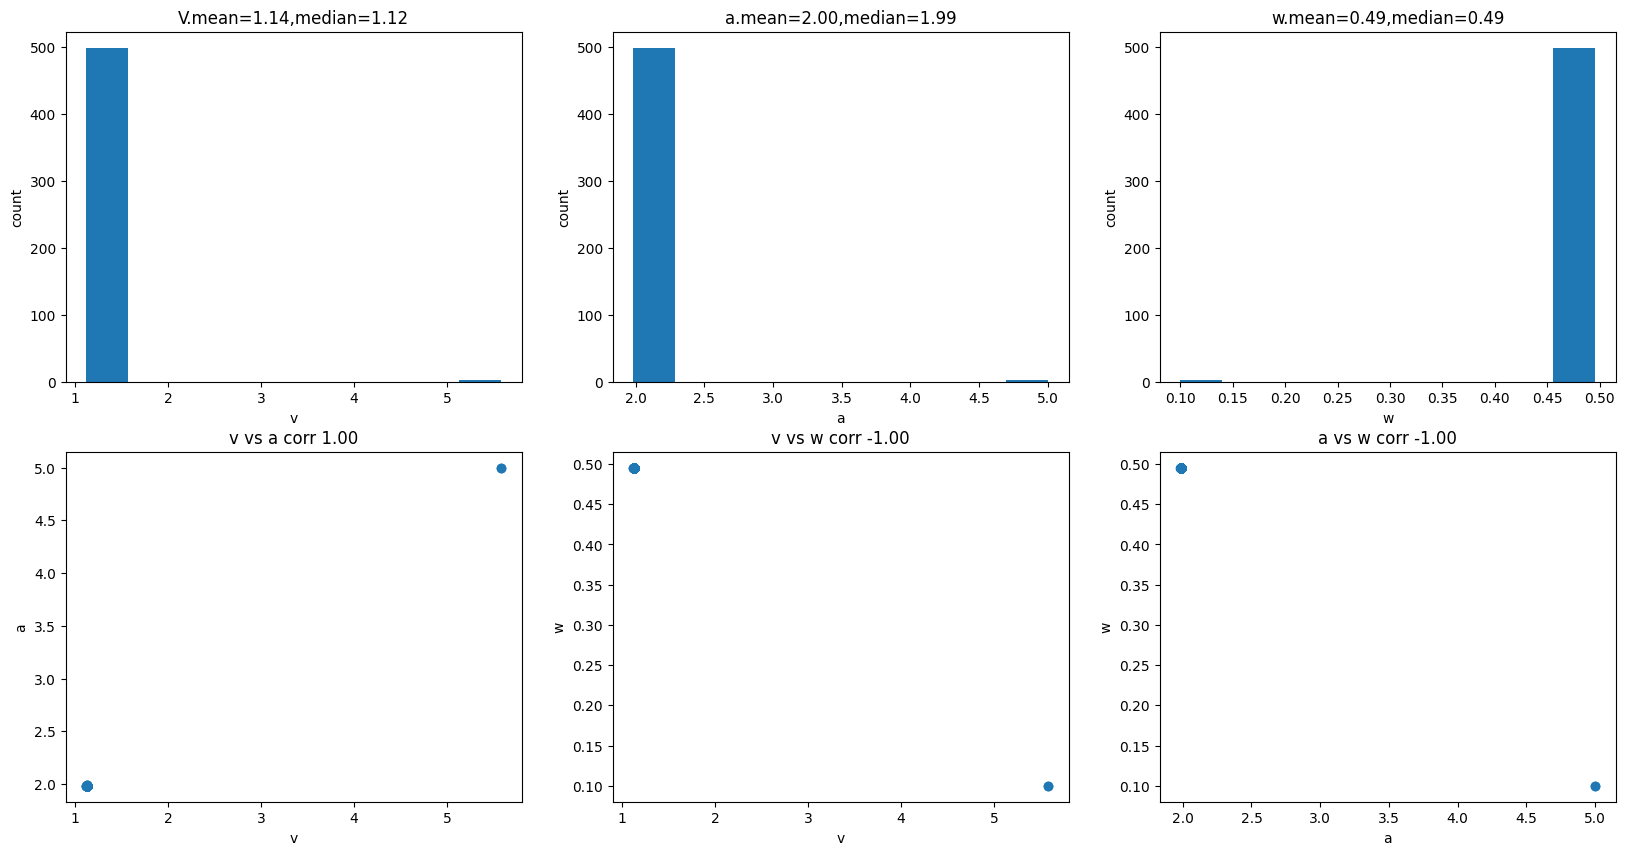

In [26]:
bads_v = bads_500_result_np_2[:,0]; bads_a = bads_500_result_np_2[:,1]; bads_w = bads_500_result_np_2[:,2];
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.hist(bads_v);plt.xlabel('v');plt.ylabel('count'); plt.title(f'V.mean={np.mean(bads_v):.2f},median={np.median(bads_v):.2f}');
plt.subplot(2,3,2)
plt.hist(bads_a);plt.xlabel('a');plt.ylabel('count'); plt.title(f'a.mean={np.mean(bads_a):.2f},median={np.median(bads_a):.2f}');
plt.subplot(2,3,3)
plt.hist(bads_w);plt.xlabel('w');plt.ylabel('count'); plt.title(f'w.mean={np.mean(bads_w):.2f},median={np.median(bads_w):.2f}');

plt.subplot(2,3,4)
plt.scatter(bads_v,bads_a);plt.xlabel('v');plt.ylabel('a'); plt.title(f'v vs a corr {np.corrcoef(bads_v,bads_a)[0,1]:.2f}');
plt.subplot(2,3,5)
plt.scatter(bads_v,bads_w);plt.xlabel('v');plt.ylabel('w'); plt.title(f'v vs w corr {np.corrcoef(bads_v,bads_w)[0,1]:.2f}');
plt.subplot(2,3,6)
plt.scatter(bads_a,bads_w);plt.xlabel('a');plt.ylabel('w'); plt.title(f'a vs w corr {np.corrcoef(bads_a,bads_w)[0,1]:.2f}');


Plot good and bad pts seperately

In [28]:
bads_v = bads_500_result_np_2[:,0]; bads_a = bads_500_result_np_2[:,1]; bads_w = bads_500_result_np_2[:,2];
truth_idx = bads_v < 3
false_idx = bads_v > 3

bads_v_true = bads_v[truth_idx]; bads_a_true = bads_a[truth_idx]; bads_w_true = bads_w[truth_idx];
bads_v_false = bads_v[false_idx]; bads_a_false = bads_a[false_idx]; bads_w_false = bads_w[false_idx];

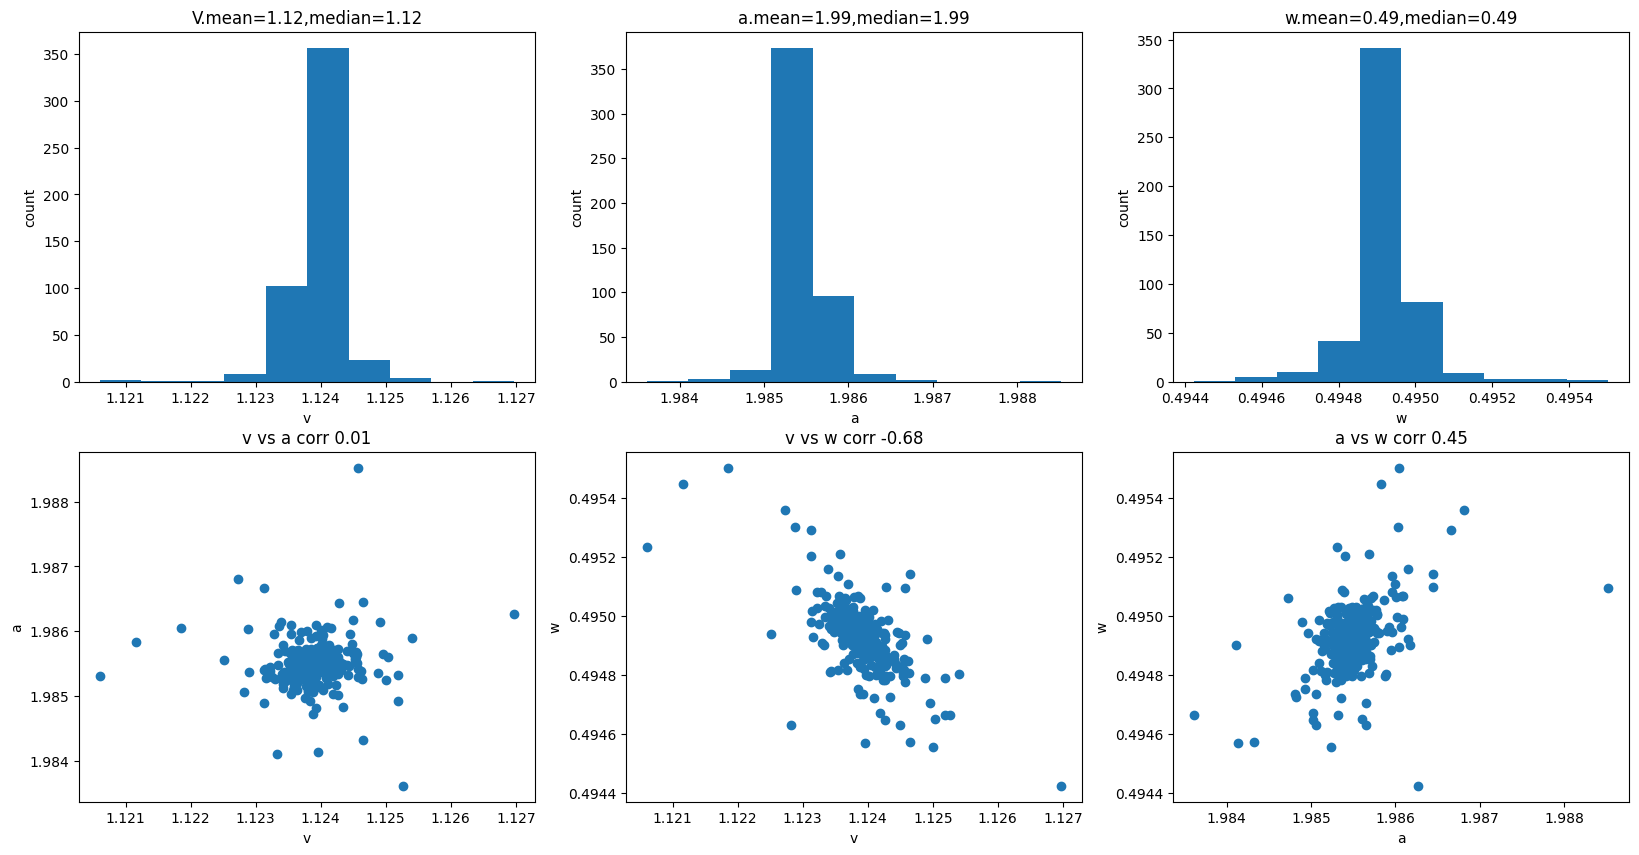

In [29]:
bads_v = bads_v_true; bads_a = bads_a_true; bads_w = bads_w_true;
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.hist(bads_v);plt.xlabel('v');plt.ylabel('count'); plt.title(f'V.mean={np.mean(bads_v):.2f},median={np.median(bads_v):.2f}');
plt.subplot(2,3,2)
plt.hist(bads_a);plt.xlabel('a');plt.ylabel('count'); plt.title(f'a.mean={np.mean(bads_a):.2f},median={np.median(bads_a):.2f}');
plt.subplot(2,3,3)
plt.hist(bads_w);plt.xlabel('w');plt.ylabel('count'); plt.title(f'w.mean={np.mean(bads_w):.2f},median={np.median(bads_w):.2f}');

plt.subplot(2,3,4)
plt.scatter(bads_v,bads_a);plt.xlabel('v');plt.ylabel('a'); plt.title(f'v vs a corr {np.corrcoef(bads_v,bads_a)[0,1]:.2f}');
plt.subplot(2,3,5)
plt.scatter(bads_v,bads_w);plt.xlabel('v');plt.ylabel('w'); plt.title(f'v vs w corr {np.corrcoef(bads_v,bads_w)[0,1]:.2f}');
plt.subplot(2,3,6)
plt.scatter(bads_a,bads_w);plt.xlabel('a');plt.ylabel('w'); plt.title(f'a vs w corr {np.corrcoef(bads_a,bads_w)[0,1]:.2f}');


/home/rka/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/rka/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


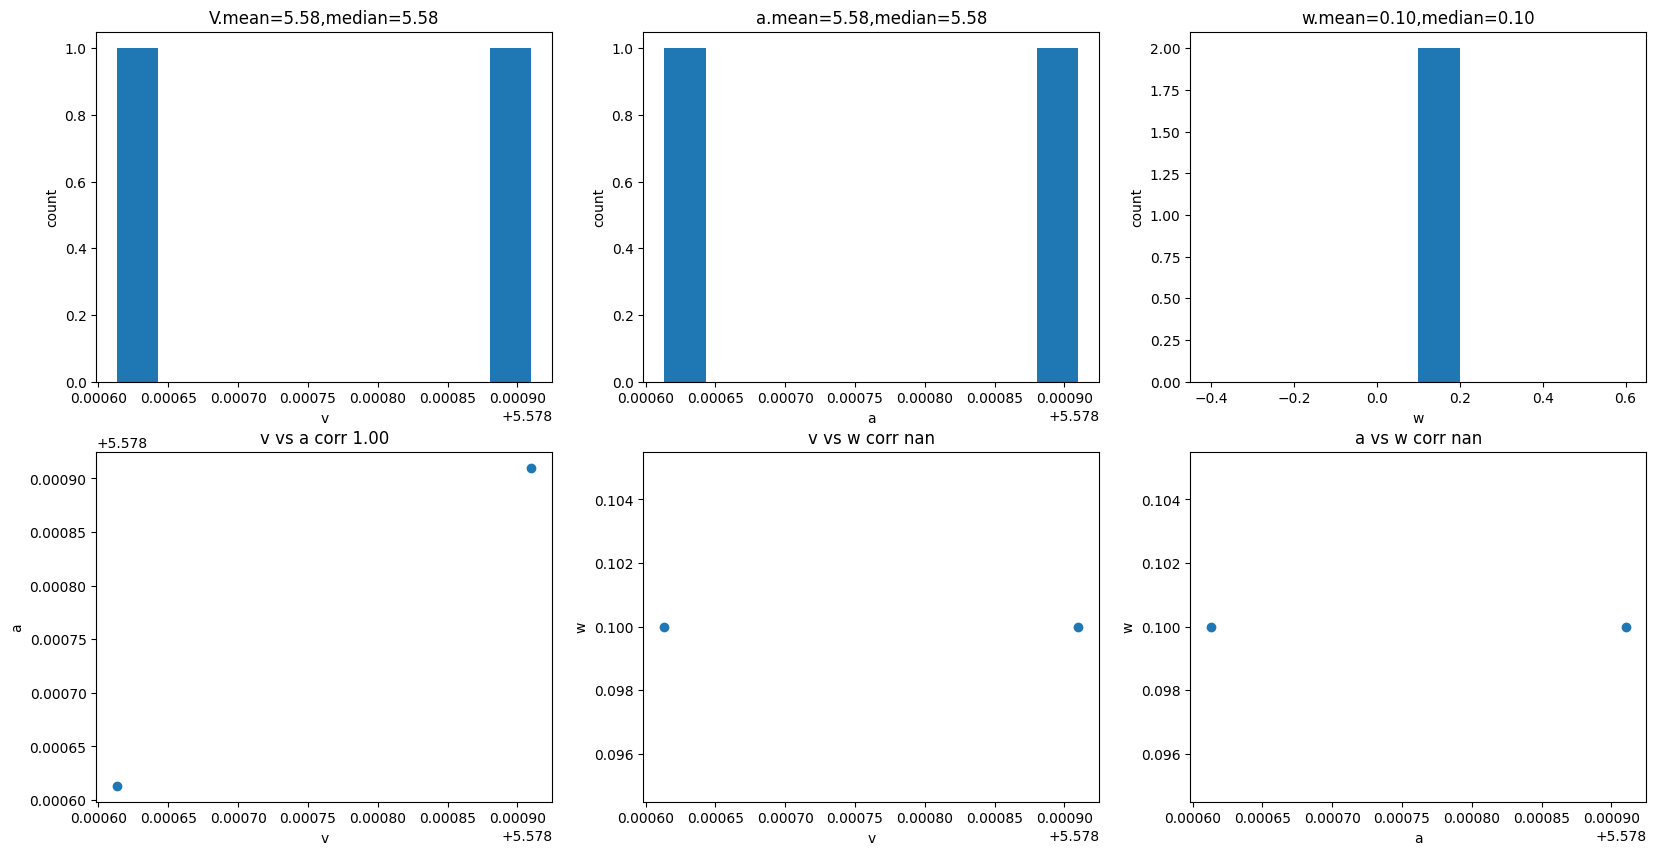

In [30]:
bads_v = bads_v_false; bads_a = bads_v_false; bads_w = bads_w_false;
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.hist(bads_v);plt.xlabel('v');plt.ylabel('count'); plt.title(f'V.mean={np.mean(bads_v):.2f},median={np.median(bads_v):.2f}');
plt.subplot(2,3,2)
plt.hist(bads_a);plt.xlabel('a');plt.ylabel('count'); plt.title(f'a.mean={np.mean(bads_a):.2f},median={np.median(bads_a):.2f}');
plt.subplot(2,3,3)
plt.hist(bads_w);plt.xlabel('w');plt.ylabel('count'); plt.title(f'w.mean={np.mean(bads_w):.2f},median={np.median(bads_w):.2f}');

plt.subplot(2,3,4)
plt.scatter(bads_v,bads_a);plt.xlabel('v');plt.ylabel('a'); plt.title(f'v vs a corr {np.corrcoef(bads_v,bads_a)[0,1]:.2f}');
plt.subplot(2,3,5)
plt.scatter(bads_v,bads_w);plt.xlabel('v');plt.ylabel('w'); plt.title(f'v vs w corr {np.corrcoef(bads_v,bads_w)[0,1]:.2f}');
plt.subplot(2,3,6)
plt.scatter(bads_a,bads_w);plt.xlabel('a');plt.ylabel('w'); plt.title(f'a vs w corr {np.corrcoef(bads_a,bads_w)[0,1]:.2f}');


# 30 only to see v vs a shape

In [2]:
N_sim = 2500; v = 1.1; a = 2
sim_results = Parallel(n_jobs=-1)(delayed(simulate_ddm)(v, a) for _ in range(N_sim))


choices, RTs = parse_sim_results(sim_results)
    
with open('sample_rt.pkl', 'wb') as f:
    pickle.dump(RTs, f)
with open('sample_choice.pkl', 'wb') as f:
    pickle.dump(choices, f)


In [15]:
lb = np.array([-5,0.01, 0.485]); ub = np.array([10, 10, 0.515])
plb = np.array([-2,0.1,0.49]); pub = np.array([8,8,0.51])
n = 2500
bads_30_res = bads_vs_N(lb,ub,plb,pub,n,v,a)

In [16]:
bads_30_np = np.array(bads_30_res)

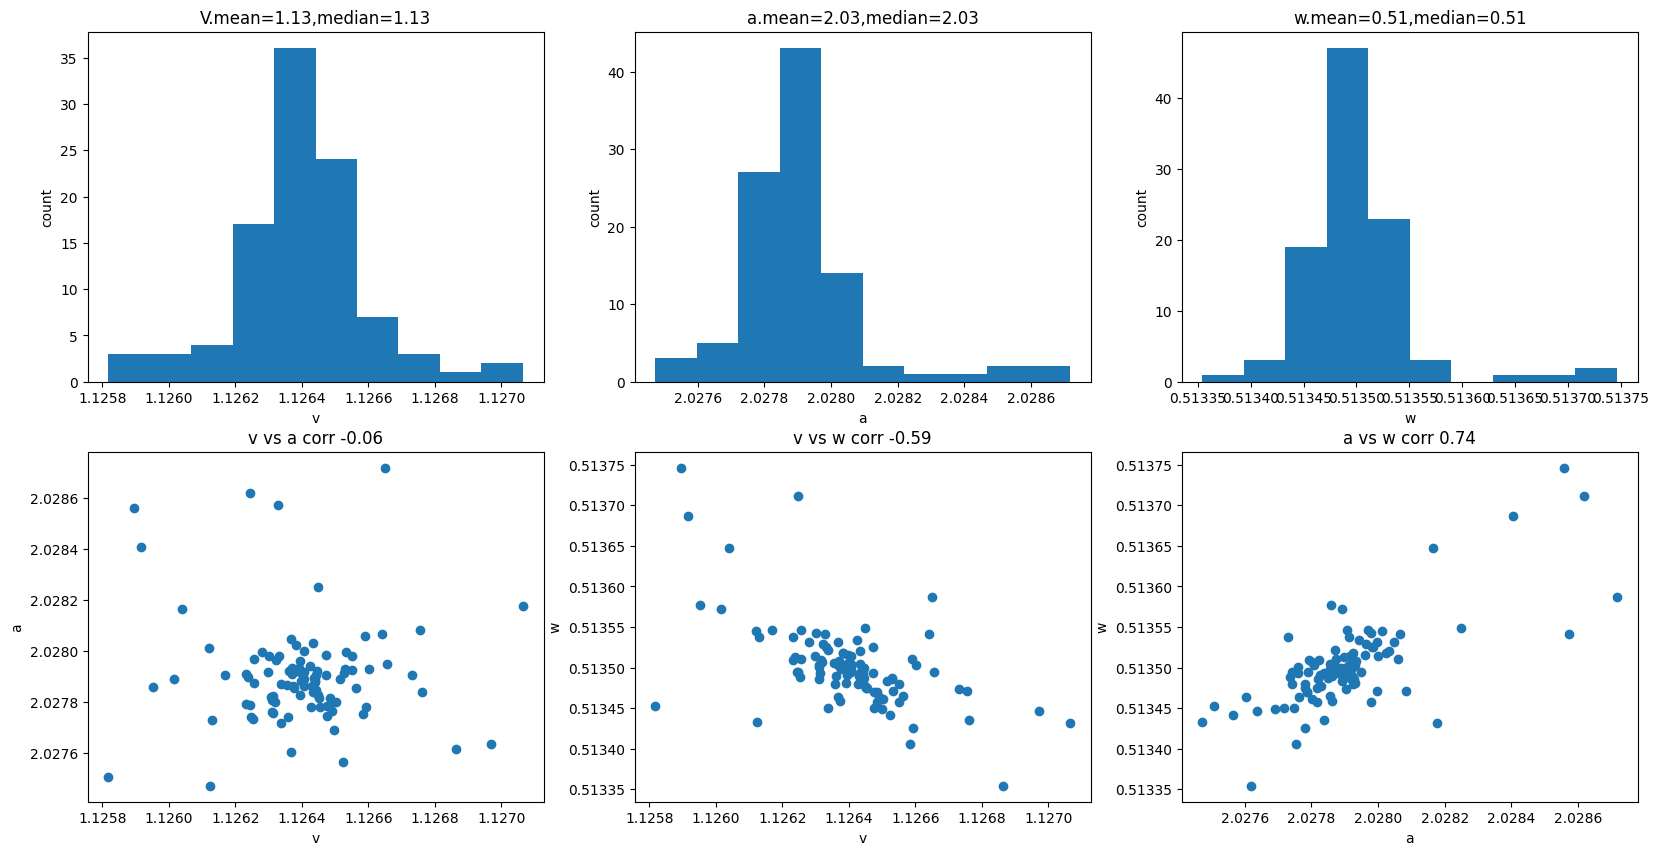

In [17]:
bads_v = bads_30_np[:,0]; bads_a = bads_30_np[:,1]; bads_w = bads_30_np[:,2];
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.hist(bads_v);plt.xlabel('v');plt.ylabel('count'); plt.title(f'V.mean={np.mean(bads_v):.2f},median={np.median(bads_v):.2f}');
plt.subplot(2,3,2)
plt.hist(bads_a);plt.xlabel('a');plt.ylabel('count'); plt.title(f'a.mean={np.mean(bads_a):.2f},median={np.median(bads_a):.2f}');
plt.subplot(2,3,3)
plt.hist(bads_w);plt.xlabel('w');plt.ylabel('count'); plt.title(f'w.mean={np.mean(bads_w):.2f},median={np.median(bads_w):.2f}');

plt.subplot(2,3,4)
plt.scatter(bads_v,bads_a);plt.xlabel('v');plt.ylabel('a'); plt.title(f'v vs a corr {np.corrcoef(bads_v,bads_a)[0,1]:.2f}');
plt.subplot(2,3,5)
plt.scatter(bads_v,bads_w);plt.xlabel('v');plt.ylabel('w'); plt.title(f'v vs w corr {np.corrcoef(bads_v,bads_w)[0,1]:.2f}');
plt.subplot(2,3,6)
plt.scatter(bads_a,bads_w);plt.xlabel('a');plt.ylabel('w'); plt.title(f'a vs w corr {np.corrcoef(bads_a,bads_w)[0,1]:.2f}');


In [6]:
bads_v = bads_30_np[:,0]; bads_a = bads_30_np[:,1]; bads_w = bads_30_np[:,2];
truth_idx = bads_v < 3
false_idx = bads_v > 3

bads_v_true = bads_v[truth_idx]; bads_a_true = bads_a[truth_idx]; bads_w_true = bads_w[truth_idx];
bads_v_false = bads_v[false_idx]; bads_a_false = bads_a[false_idx]; bads_w_false = bads_w[false_idx];

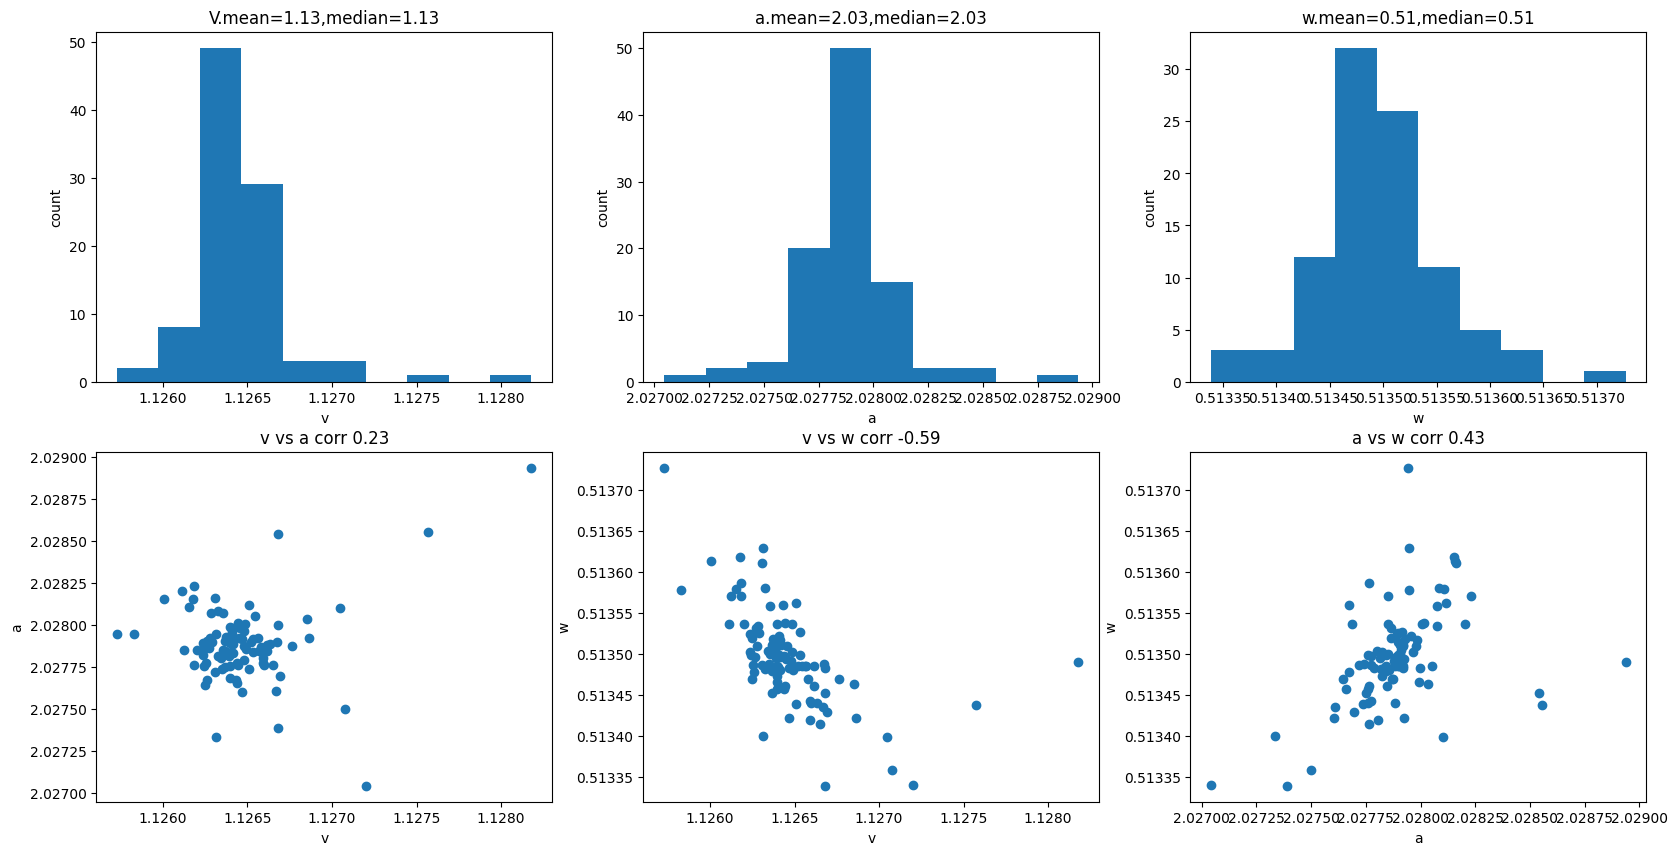

In [7]:
bads_v = bads_v_true; bads_a = bads_a_true; bads_w = bads_w_true;
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.hist(bads_v);plt.xlabel('v');plt.ylabel('count'); plt.title(f'V.mean={np.mean(bads_v):.2f},median={np.median(bads_v):.2f}');
plt.subplot(2,3,2)
plt.hist(bads_a);plt.xlabel('a');plt.ylabel('count'); plt.title(f'a.mean={np.mean(bads_a):.2f},median={np.median(bads_a):.2f}');
plt.subplot(2,3,3)
plt.hist(bads_w);plt.xlabel('w');plt.ylabel('count'); plt.title(f'w.mean={np.mean(bads_w):.2f},median={np.median(bads_w):.2f}');

plt.subplot(2,3,4)
plt.scatter(bads_v,bads_a);plt.xlabel('v');plt.ylabel('a'); plt.title(f'v vs a corr {np.corrcoef(bads_v,bads_a)[0,1]:.2f}');
plt.subplot(2,3,5)
plt.scatter(bads_v,bads_w);plt.xlabel('v');plt.ylabel('w'); plt.title(f'v vs w corr {np.corrcoef(bads_v,bads_w)[0,1]:.2f}');
plt.subplot(2,3,6)
plt.scatter(bads_a,bads_w);plt.xlabel('a');plt.ylabel('w'); plt.title(f'a vs w corr {np.corrcoef(bads_a,bads_w)[0,1]:.2f}');


# fitting only 2 param

In [18]:
N_sim = 2500; v = 1.1; a = 2
sim_results = Parallel(n_jobs=-1)(delayed(simulate_ddm)(v, a) for _ in range(N_sim))


choices, RTs = parse_sim_results(sim_results)
    
with open('sample_rt.pkl', 'wb') as f:
    pickle.dump(RTs, f)
with open('sample_choice.pkl', 'wb') as f:
    pickle.dump(choices, f)


In [19]:
from bads_2_param_utils import *

In [20]:
lb = np.array([-5,0.01]); ub = np.array([10, 10])
plb = np.array([-2,0.1]); pub = np.array([8,8])
n = 2500
bads_30_res = bads_vs_N_2param(lb,ub,plb,pub,n,v,a)

In [21]:
bads_2p_np = np.array(bads_30_res)

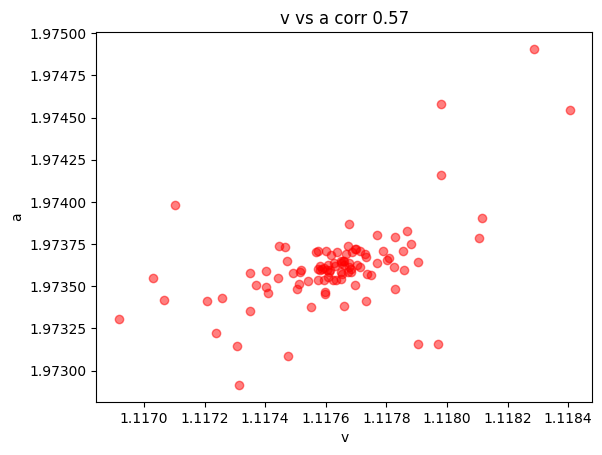

In [25]:
plt.scatter(bads_2p_np[:,0], bads_2p_np[:,1], color='r', marker='o', alpha=0.5);
plt.xlabel('v'); plt.ylabel('a');plt.title(f'v vs a corr {np.corrcoef(bads_2p_np[:,0], bads_2p_np[:,1])[0,1]:.2f}');

In [26]:
np.mean(bads_2p_np[:,0]),np.mean(bads_2p_np[:,1])

(1.1176292910640542, 1.9736179557794944)